##### Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
data=pd.read_csv('C:\\python\\Machine learning\\Datasets\\1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##### Data Cleaning

In [23]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [24]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

##### Let's divide the data into dependent variable and independent variable

In [25]:
X=data.iloc[:,:-1].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [26]:
Y=data.iloc[:,-1].values
Y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

##### Data Visualization

<AxesSubplot:>

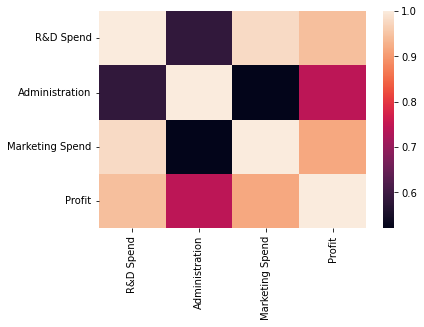

In [27]:
sns.heatmap(data.corr())

From the above graph we can see that there is highly correlation between 'Profit' and 'R&D Spend' as compare to 
'Marketing Spend' and 'Administration'. 

##### Encoding categorical data

In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

##### Avoiding Dummy Variable Trap:

In [30]:
X=X[:,1:]
X

array([[136897.8, 471784.1, 2],
       [151377.59, 443898.53, 0],
       [101145.55, 407934.54, 1],
       ...,
       [241926.31, 227142.82, 0],
       [321652.14, 281692.32, 0],
       [270939.86, 295442.17, 2]], dtype=object)

##### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

##### Fitting Multiple Linear Regression Model to Training set

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##### Prediction

In [33]:
y_pred=model.predict(x_test)
y_pred

array([ 90209.64901318,  88876.28325862,  95200.74973042, 174739.58503941,
        84013.74722284, 110572.81423949, 169438.58451208,  91855.1682484 ,
       163402.29005648,  54991.76617392,  67874.72481309, 150180.9861358 ,
       126512.60670878,  60430.86889281, 175991.46628657,  76097.46542299,
       118577.95366564, 163338.33779446, 165329.70854714, 180487.66382609,
       101238.40282718,  86180.18269683, 179933.75346041,  84689.06190888,
       105088.13051962, 101399.34780971,  40828.42858138,  58070.59626831,
        69777.85472814, 226802.72627013, 121052.52594777, 111658.45981284,
       101689.86321283, 137852.59801618,  64960.45224275, 108854.95146996,
       184345.94907957, 170595.15880734, 173725.92497117, 118014.06326024,
        97038.60706862, 164196.76013804, 107746.47058118,  52030.50278345,
       116882.08703837,  59741.11018494, 157857.27897357,  79750.07622713,
       159139.45816291, 131182.41311202, 183735.81760226, 173691.52102156,
        94077.16471212,  

##### Calculating the coefficients and intercepts

In [34]:
model.coef_

array([   1.04239904,    0.35510511, -320.45531609])

In [15]:
model.intercept_

-88623.76527343795

##### Let's see how the model is good fitted

In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8985038788872524